# Lecture 10.2 Unsupervised Learning

In [2]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 1. Clustering Models

We will work on two clustering models: K-Means, and DBSCAN. Note that clustering models solve unsupervised learning problems, and there is no observed outcome variables. Therefore, there is no "overfitting" issue, and we do not need to split our data.

### 1.1 KMeans
As mentioned in class, K-Means works well when data has a round or oval shape. In below, we would first generate data with round shape, then use K-Means for clustering.

For data generation, use: sklearn.datasets.make_blobs. 

For K-Means clustering, use syntax:
**<center>sklearn.cluster.KMeans()</center>**
- n_clusters: the number of clusters to use
- n_init: the number of k-means to run with different initial points. Default = 10
- random_state: the generation of initial points



Similar to supervised learning methods, we use .fit to train our model, use .predict for prediction. Instead of predicting a "y", we are predicting a cluster label. We can even use .score to get performance measure. However, the performance measure is irrelevant to "how well we predict", but about "how close the points are". Specifically, the value is -SSE (negative value).

We can also use .cluster_centers_ to get the centroids. 

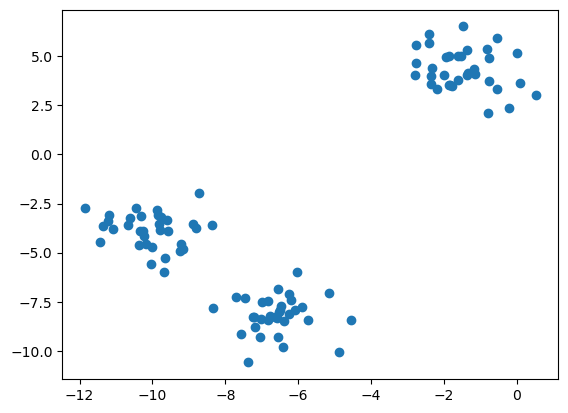

In [2]:
# S1.1: Data Generation
#we are no longer predicting "y" we are instead predicting cluster labels 
#interpretting absolute value of SSE
#no longer split our data, no longer have overfitting concern
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

# S1.2: Plot Data
plt.scatter(X[:,0], X[:,1])

In [6]:
# S2: K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)

kmeans.fit(X)
# Predict the class labels

cls_predict = kmeans.predict(X)
#3 clusters, 0,1,2

print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(X)) #-SSE
print("Cluster Centers: \n", kmeans.cluster_centers_)   

Predicted Labels: [1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
Performance Score: -156.28289251170003
Cluster Centers: 
 [[-10.04935243  -3.85954095]
 [ -1.4710815    4.33721882]
 [ -6.58196786  -8.17239339]]


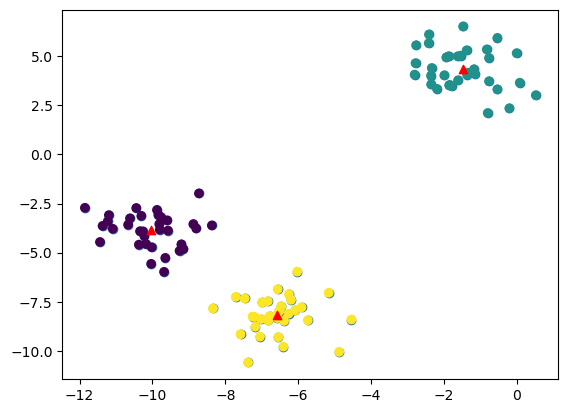

In [10]:
# S3: Visualize our results:
#how well are you doing the clustering
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c=cls_predict) #predicted cluster labels as colors

#visualizing the centroids
#first two elements are x axis & y axis values
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],  marker='^', c = 'r')

### 1.2 DBSCAN
DBSCAN works well for arbitrary shape. Thus, we will create a dataset with moon shape and check its performance.

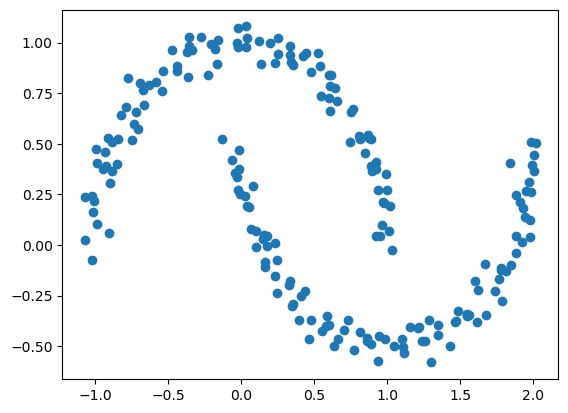

In [12]:
# Data Generation - simulate data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

DBSCAN is realized using syntax:

**<center>sklearn.cluster.DBSCAN</center>**
- eps: the epsilon size. default is 0.5
- min_samples: the MinPts. default is 5

Instead of using .fit to train our model, we use **.fit_predict(X_INPUT)** to train and predict at the same time. The output would be the cluster labels.

#### Choosing eps and min_samples
DBSCAN is sensitive to the choice of parameters. A rule of thumb would be: 
- min_samples = 2* feature number;
- eps: adjusted based on number of clusters obtained. 
    - If too many clusters => increase eps, 
    - If too few clusters => decrease eps.

#### Rescaling Data Recap (I)
One key point for DBSCAN is rescaling. As density is defined on a circle around a point, it is important to standardize the data, so that all variables have zero mean and unit variance (and in the same scale). Recall that standardization is realized using syntax:

**<center>sklearn.preprocessing.StandardScaler</center>**

Similar to all models, use .fit to train the model. Then use **.transform()** to get the scaled output.

In [15]:
# S1: Preprocessing
#2d * 2 = 4 --> min_samples calculation 
#if too few clusters --> focusing on local pattern
#esp large, fewed clusters, larger circles, more points in a circle, fewer clusters
#DB requires scaling because density is defined on the circle, assumping all points are under the same scale
from sklearn.preprocessing import StandardScaler #MinMaxScalar (look at minmax)
scaler = StandardScaler() #fit_transform (not recommended - technically feasible)
scaler.fit(X)             #particularily true when working on supervised learning 

#write fit & transform separately 
X_scaled = scaler.transform(X)

#before and after transfer (scaling)
np.mean(X), np.mean(X_scaled)
np.var(X), np.var(X_scaled)
X_scaled, X

(array([[ 0.36748451,  0.54576641],
        [ 1.28731953, -1.2803031 ],
        [-0.59397643,  0.04357482],
        [-1.74182239, -0.66371706],
        [ 1.45705144, -0.85667812],
        [ 1.58953574, -0.59675854],
        [ 0.54875768, -0.08552893],
        [ 0.44914675, -1.50218876],
        [ 0.46138047,  0.23124986],
        [ 0.71117525, -1.59382202],
        [-0.98693652,  1.16613579],
        [-0.28618307, -0.9941549 ],
        [ 1.51445888, -0.7760272 ],
        [ 0.82589866, -1.33505302],
        [-1.51451022,  0.79027655],
        [ 0.55545785, -0.08853775],
        [ 0.05104108,  1.284163  ],
        [-0.17030547, -1.12065006],
        [-0.1659644 ,  1.28843594],
        [-1.46106881,  1.15527198],
        [ 1.63987535, -0.48630812],
        [ 0.41814803, -1.47618916],
        [-0.34023715,  1.50810931],
        [ 0.90980627, -1.26183242],
        [-0.88905065,  1.56616629],
        [-0.29208555, -0.66541512],
        [ 1.55266276, -0.70888274],
        [ 1.59187607, -0.419

In [24]:
# S2: Apply DBSCAN
from sklearn.cluster import DBSCAN

#both esp & min_samples are default
dbscan = DBSCAN(eps=0.5, min_samples=5)
#dbscan = DBSCAN(eps=0.1, min_samples=5) --> 0.1 more clusters & more restrictive
#-1 is not a cluster label, -1 is noise / outliers ****
#find max cluster label 

clusters = dbscan.fit_predict(X_scaled)

print(clusters) #2 clusters
np.max(clusters) #7 clusters with 0.1

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


1

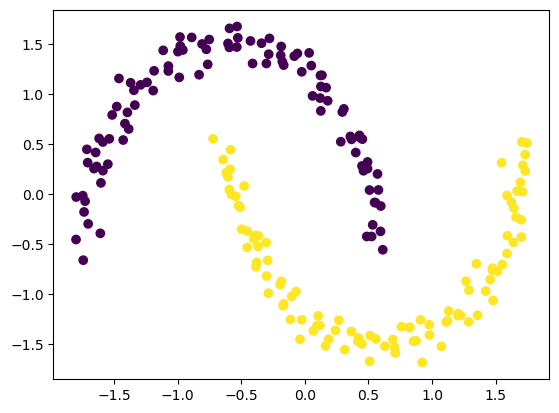

In [25]:
# S3: plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)

#lots of clusters with 0.1 --> mis-specified epsilon 

## 2. PCA
PCA is a dimension reduction tool. It transfers original $X$ to a set of $X_{new}$. Based on our specific needs, only a subset of $X_{new}$ would be kept, and the dimension would be reduced accordingly.

PCA can be realized using syntax:
**<center>sklearn.decomposition.PCA</center>**

- **n_components:** can be integer or float. 
    - If integer, then n_components is the number of components to keep; 
    - If float, then n_components is the percentage of variance explained.
- copy: whether to keep the original dataset. Default is True (recommended setting). If False, then the new variables will overwrite the original variable.
- whiten: bool. Default is False. If True, then new variables have variance = 1.
- random_state: technical reasons

We can use **.fit_transform(X)** to both train the model, and produce the new variables (with dimension reduction) directly. To transfer the new data back to the original data, use **.inverse_transform(Xnew)**.

### PCA Attributes
After applying .fit_transform(), we can obtain the corresponding attributes:
- **.components_:** It shows how the new variables are generated. Recall that the new variable is a linear transfer or the original variables, the output of .components_ is the coefficients of the linear transfer
- **.explained_variance_ratio_:** It shows the percentage of variance explained by each new variable.


### Practice
Suppose we have a dataset with three dimensions. The data points follow a ring-shape (on the x, y plane), but a bit tilted (on the z axis). We would like to reduce the dimension to 2 using PCA.
- After the transfer, what is the proportion of variance in the original dataset included?
- Suppose I want to keep more than 95% of the information, is the transfer proper?
- Can you write down the relationship between the new Xs and the original Xs?

In [3]:
# S0 Data Generation - simulated data 
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

## Prep for 3D data generation
X = np.empty((m, 3))

## The "Ring"
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

## The "Tilt"
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

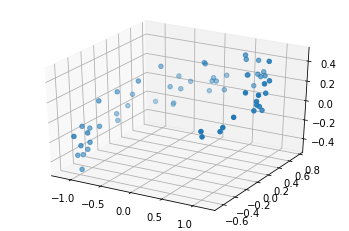

In [15]:
# Visualize the data
#tilted ring, lift one side a little bit
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [4]:
# S1: Apply PCA
#reduce dimensions to 2
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2, random_state = 0, whiten = True)

X2D = pca2.fit_transform(X) #throw in original X

print("Before transfer, the dimension is:", X.shape[1], "\n",
      "After transfer, the dimension is:", X2D.shape[1])

Before transfer, the dimension is: 3 
 After transfer, the dimension is: 2


In [6]:
#X2D

In [7]:
# S2: Finding the "explained variance", or the information kept after transfer
#how much variance is explained for each component after transfer
pca2.explained_variance_ratio_ #2 values, 2 components, order matters, earlier it appears, smaller component numberm the more important it is
#(one for each component)
#sequence matters 

array([0.84248607, 0.14631839])

In [11]:
#EXAM
##suppose instead of keeping dimension to 2, keep atleast 95% of total information, without running additional code, or running the model again
#how many components should I keep? 
#0.82+0.14 = 0.98 which is greater than 0.95
#keep 1 dimension, PC1 has 84.2% of the information, need additional dimensions
#check PC1 + PC2
#check info with 2 components 
print(np.sum(pca2.explained_variance_ratio_)) #is greater than 95% which means it satisfied the requirements

#how much information is lost
print(1 - np.sum(pca2.explained_variance_ratio_))

#shows importance of components

0.988804464429311
0.011195535570688975


In [12]:
# S3: Finding the transfer
#components are nothing but the linear transfer of your original variables & stores your coefficients 
#still find alphas and betas --> stored in components 
pca2.components_
#3 columns, input x has dimension of 3
#2 rows- keeping 2 components  

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [13]:
# Suppose the original variables are X1, X2, X3, correspondingly
## Then: 
## X1_new = -0.936X1 -0.299X2 - 0.185X3
## X2_new = 0.340X1 - -0.901X2 - 0.268X3

## Practice: Facial Recognition

In this practice, we will do facial recognition using the tools we've learned. Let's first meet the data.
### The Wild Face Dataset
The Wild Face Dataset is a collection of pictures of famous people over the internet. It has altogether 5749 people and 13233 pictures. Each picture has 5828 features, and each feature is a real number between 0 and 255. The dataset can be obtained through:
**<center>sklearn.datasets.fetch_lfw_people</center>**
- min_faces_per_person: minimum number of faces required for a person (class label) to be included)
- resize: float, the factor used to resize the image (closer to 1 => more features)

In [16]:
# Load the Data
## For the first time, the code may take several minutes to run
#gray scale no RGB
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
#min faces per person- specifying people with atleast 20 pictures
#resize- original dimensionality is too high, bring down the dimension by a little bit 

In [18]:
# Check features
print("keys:", people.keys())
print("target shape:", people.target.shape) #3,000 records 
print("data shape:", people.data.shape) #X: 3000 rows, 5500 columns
print("image shape:", people.images.shape) #columns based on how we cut our pictures (3,000 pictures, (87,65) how we are cutting our picture cutting it like a checkboard 87 columns and 68 rows)
print('target_names shape:', people.target_names.shape) #62 distinct people, target is to tell us who it is 

#each picture will have 87*65 grids = 5655 # columns in the data --> dimension of X

# 3023 pictures, each picture described by 87*65=5655 features. 62 unique people (classes) --> multiple classification problem, 62 classes 
#target is who the person is


keys: dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
target shape: (3023,)
data shape: (3023, 5655)
image shape: (3023, 87, 65)
target_names shape: (62,)


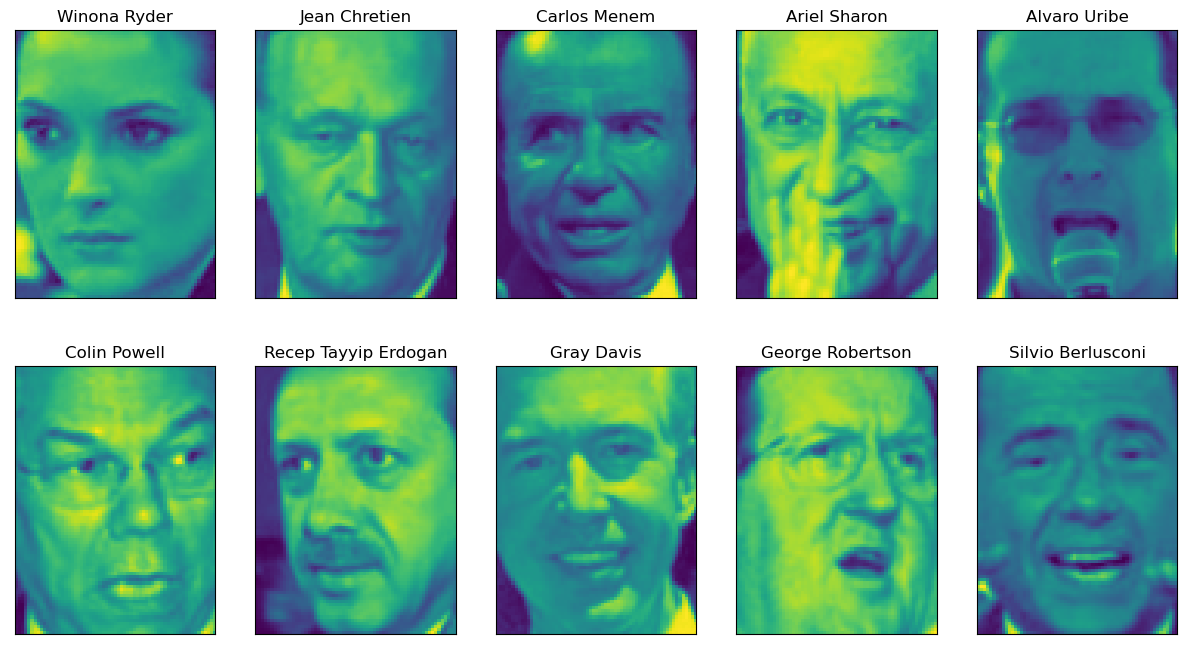

In [19]:
# Check a couple of pictures

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
    #divide canvas into 2 rows and 5 columns 
    
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='viridis')
    ax.set_title(people.target_names[target])
#showing target together with targer name, images is the rows and columns and specific value of rows and columns (gray scale)
    
#only gray scales recorded in data set, coloring the grid of a picture 1 by 1

In [21]:
counts=np.bincount(people.target)
counts
#is in accordance to original requirement
#number of picture per a person 

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [23]:
# Data for Analysis
X = people.data
y = people.target

from sklearn.model_selection import train_test_split

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

#stratify: guarentee proportion of y labels (ys in y train and y test) is consistent with general y, if a person has 20% of pictures, then training should also have

### Nearest Neighbor Classification with PCA
Using KNN as an example, let's see how PCA would influence the classifiers' performance. 

For simplification, we do not seek the best k, instead, let k=1. We will start by a classifier without PCA.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
#more columns than number of rows??
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#without PCA, Naive Model
print("Test set score of 1-nn is:", knn.score(X_test, y_test))

Test set score of 1-nn is: 0.3253968253968254


### Scaling Data (II)

We may consider scaling the data to seek performance improvement. Then the questions would be: which scaler to use? Standard or minmax? Does my data contain outliers? Is it meaningful to keep a certain range of my transferred variable?

For minmax scaler, use:

**<center>sklearn.preprocessing.MinMaxScaler</center>**

Use .fit to train and use .transform to get the scaled the data.

In [24]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1)) #range [0,1] which is default
#fall in a sharp region of 0 to 1, after scaling, finds between 0 and 1 which is the default
#equivalent to MinMaxScalar()

#writing fit & transform separately....why? 
# Train our scaler
minmax.fit(X_train) #min and max for X_train 

#using same minmax, scaling using x_train for both

MinMaxScaler()

In [25]:
# Get scaled variables
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)
# X_train_scaled

#WRONG
#minmax.fit_transform(X_train) #scaling using minmax from x_train
#minmax.fit_transform(X_test) #scaling using minmax from x_test which is wrong 

In [26]:
# We can also do the scaling manually. The result might differ slightly
X_manual_train = X_train/255
# X_manual_train

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) #after scaling, training on scaled axis
print("Test set score of 1-nn is:", knn.score(X_test_scaled, y_test))
#improved 32 to 34, marginal improvement

Test set score of 1-nn is: 0.33994708994708994


### PCA
Now let's try PCA. We would like to reduce the dimension to 100. Given the training sample size be around 2000, we consider this dimension proper. Given the 100 new variables, what would be the performance of the knn classifier?

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,  whiten=True, random_state=0) #bring dimension down 100
#whiten to make sure scale has a variance of 1

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (2267, 100)


In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: ", knn.score(X_test_pca, y_test))
#performance is still low, but improved from 34% to 45% 
#throw away 5400 columns? 

Test set accuracy:  0.45105820105820105


In [33]:
np.sum(pca.explained_variance_ratio_)
#100 values because 100 components
#kept 90% of data

0.89834344

In [35]:
pca.components_
#100 records % 5500 columns to get transfer 
#instead of considering it as a matrix, consider it: for each row, the 5500 values are the grrayscales for each grid 
#each value is telling you how you are going to color your little grids 
#each component has a meaning 

array([[-0.00476362, -0.00513477, -0.00544772, ..., -0.00543634,
        -0.00532049, -0.00492963],
       [ 0.01327512,  0.01306853,  0.01297683, ..., -0.02262183,
        -0.02181469, -0.02068427],
       [ 0.02930908,  0.02965276,  0.03030199, ...,  0.01828211,
         0.017093  ,  0.01590577],
       ...,
       [-0.02024545, -0.02206665, -0.02153568, ..., -0.02762445,
        -0.02206719, -0.01464693],
       [ 0.0344951 ,  0.03083446,  0.02465328, ..., -0.00295632,
        -0.00553183, -0.004524  ],
       [-0.01149235, -0.00711852, -0.00114776, ..., -0.01889203,
        -0.02221774, -0.0268353 ]], dtype=float32)

### Visualizing Components

The transfer provides a improvement in the model performance. Besides, we can visualize our new variables (now these new variables are called "eigenfaces"). Now try the cell below: 

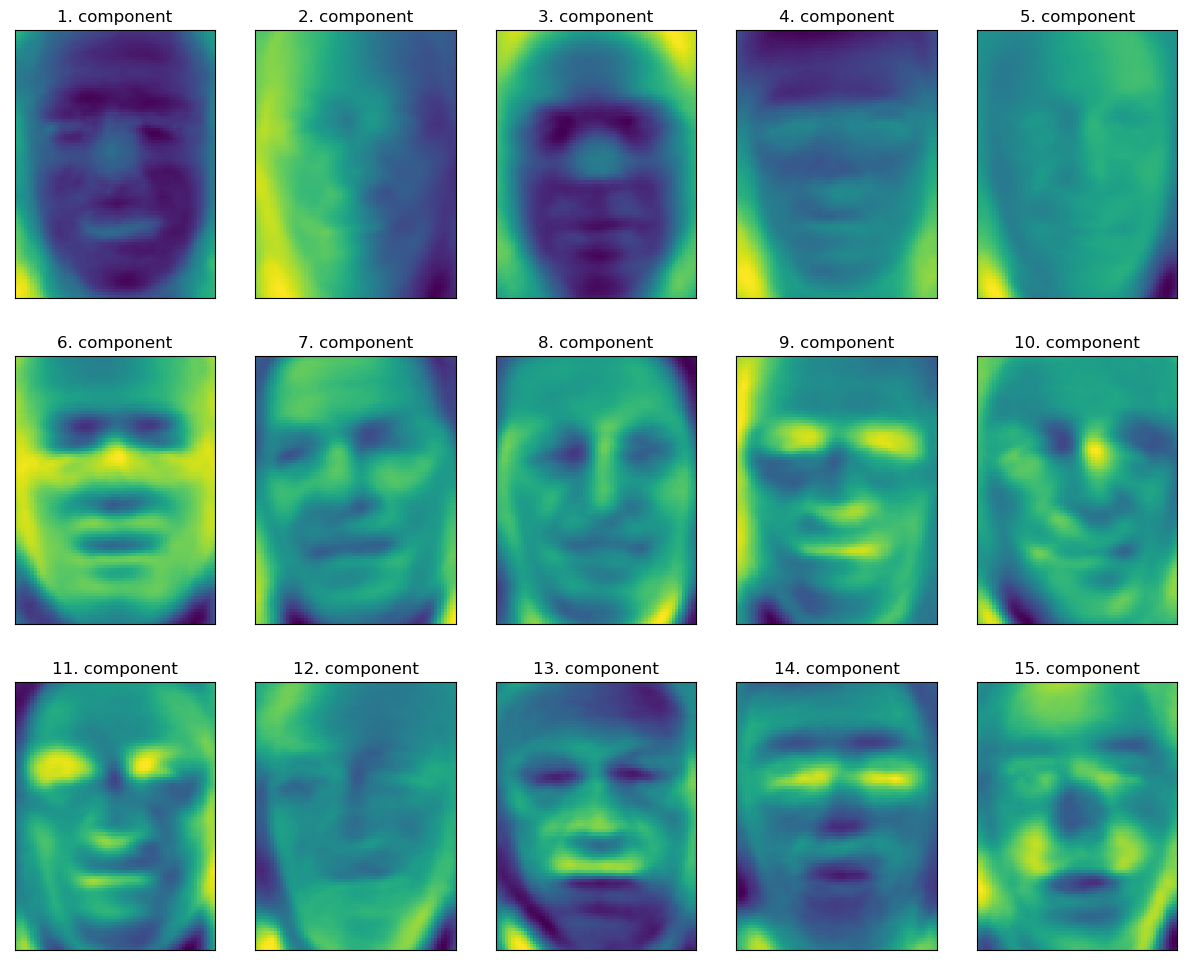

In [36]:
#naive nearest neighbor model???
#can you svm, deicison tree, random forest and see if you get better performance 
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
    
#each picture is each component, coloring each little grid as a gray scale
#after the transfer
#coloring each little grid using each component value
#not like jpeg, colored based on coefficient values 

As you can image, PCA can be applied with different supervised learning methods. For this specific problem, PCA can be combined with other methods such as Naive Bayes, SVM, Random Forests, etc. All we need to do is to change the cells with KNN to the specific models.